In [338]:

import numpy as np
import pandas as py
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [339]:
data = py.read_csv('train (3).csv')

In [340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [341]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [342]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [343]:
empty_cols = data.columns[data.isnull().any()]
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [344]:
data['Title'] = data['Name'].str.extract(', ([a-zA-Z]+)\. ',expand=False)
py.crosstab(data['Title'], data['Sex'])
data.head()
data['Title'].value_counts()
mapTitle = {"Mr":0,"Mrs":1,"Miss":2, "Master":3,"Other":4}
def mapTitleFun(x):
    if x == "Mr":
        return 0
    elif x == "Mrs":
        return 1
    elif x == "Miss":
        return 2
    elif x == "Master":
        return 3
    else:
        return 4
data['Title'] = data['Title'].apply(lambda x : mapTitleFun(x))
data['Title'].value_counts()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [345]:
data.groupby(['Sex','Pclass','Title']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass Title                                                         
female 1      1       491.785714  0.976190  40.882353  0.785714  0.380952   
              2       426.391304  0.956522  30.000000  0.391304  0.586957   
              4       639.500000  1.000000  33.666667  0.166667  0.000000   
       2      1       447.024390  0.902439  33.682927  0.682927  0.658537   
              2       438.352941  0.941176  22.390625  0.264706  0.558824   
              4       444.000000  1.000000  28.000000  0.000000  0.000000   
       3      1       420.523810  0.500000  33.515152  0.619048  1.452381   
              2       391.166667  0.500000  16.123188  1.009804  0.529412   
male   1      0       441.186916  0.345794  41.580460  0.280374  0.252336   
              3       518.333333  1.000000   5.306667  0.666667  2.000000   
              4       569.750000  0.416667  48.727273  0.500000  0.083333   
       2      0       445.901099  0.087912  32.768293  0.307692  0.131868   
              3       463.555556  1.000000   2.258889  0.888889  1.222222   
              4       453.875000  0.000000  42.000000  0.125000  0.125000   
       3      0       461.416928  0.112853  28.724891  0.285266  0.125392   
              3       388.285714  0.392857   5.350833  2.928571  1.357143   

                           Fare  
Sex    Pclass Title              
female 1      1       93.170636  
              2      124.402715  
              4       56.688900  
       2      1       23.496139  
              2       20.393750  
              4       13.000000  
       3      1       18.233529  
              2       15.248043  
male   1      0       68.034385  
              3      117.802767  
              4       47.375000  
       2      0       19.252564  
              3       27.306022  
              4       16.796875  
       3      0       11.299762  
              3       28.177232

In [346]:
def processAge(x):
    if x['Sex'] == 'male':
        if x['Pclass'] == 1:
            if x['Title'] == 0:
                return 42
            elif x['Title'] == 3:
                return 5
            elif x['Title'] == 4:
                return 49
        elif x['Pclass'] == 2:
            if x['Title'] == 0:
                return 33
            elif x['Title'] == 3:
                return 2
            elif x['Title'] == 4:
                return 42
        elif x['Pclass'] == 3:
            if x['Title'] == 0:
                return 29
            elif x['Title'] == 3:
                return 5
    elif x['Sex'] == 'female':
        if x['Pclass'] == 1:
            if x['Title'] == 1:
                return 41
            elif x['Title'] == 2:
                return 30
            elif x['Title'] == 4:
                return 34
        elif x['Pclass'] == 2:
            if x['Title'] == 1:
                return 34
            elif x['Title'] == 2:
                return 22
            elif x['Title'] == 4:
                return 28
        elif x['Pclass'] == 3:
            if x['Title'] == 1:
                return 34
            elif x['Title'] == 2:
                return 16

data['Age'] = data['Age'].fillna(data['Age'].mean())
#data['Age'] = data.apply(lambda x : processAge(x) if np.isnan(x['Age']) else x['Age'],axis=1)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

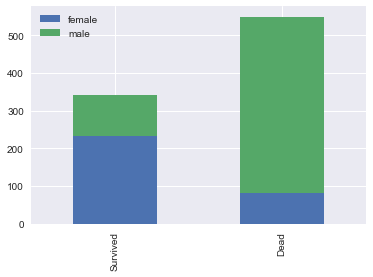

In [347]:
survived = data[data['Survived'] == 1]['Sex'].value_counts()
dead = data[data['Survived'] == 0]['Sex'].value_counts()
df = py.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind = 'bar',stacked=True)

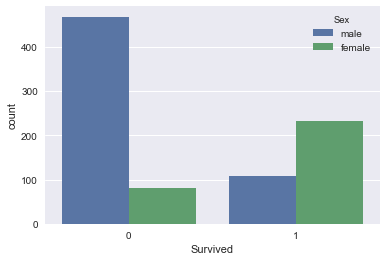

In [348]:
sns.countplot(x='Survived',hue='Sex',data=data)

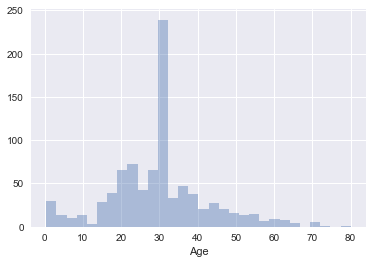

In [349]:
sns.distplot(data['Age'].dropna(),bins=30,kde=False)

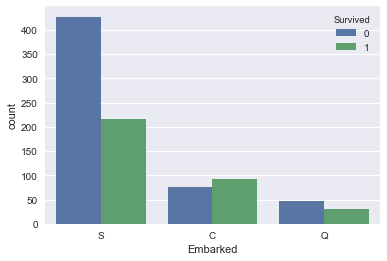

In [350]:
sns.countplot(data['Embarked'].dropna(),hue=data['Survived'])

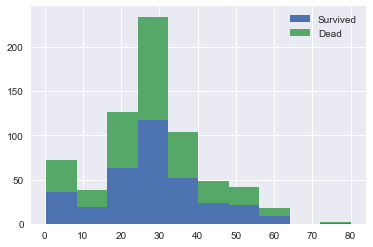

In [351]:
plt.hist([data[data['Survived'] == 1]['Age'],data[data['Survived'] == 1]['Age']],stacked=True,label=['Survived','Dead'])
plt.legend()

C:\Users\d062804\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


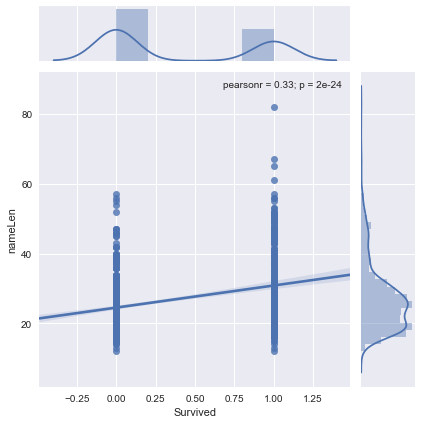

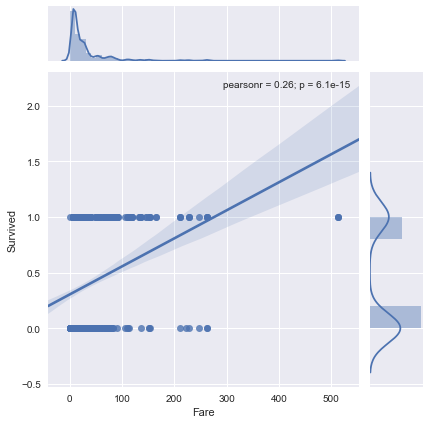

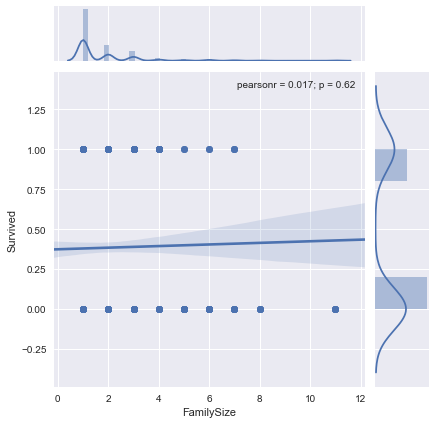

In [352]:
data['nameLen'] = data['Name'].apply(lambda x: len(x))
sns.jointplot(data['Survived'],data['nameLen'],kind='reg')
sns.jointplot(data['Fare'],data['Survived'],kind = 'reg')
#data['faredevide'] = py.qcut(data['Fare'],4)
#data[['faredevide','Survived']].groupby(['faredevide']).mean()
data['FamilySize'] = data['SibSp'] + data['Parch']+1
sns.jointplot(data['FamilySize'],data['Survived'],kind = 'reg')
data.drop(['SibSp','Parch'],axis=1,inplace=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,nameLen,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,U,S,0,23,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,C,1,51,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,U,S,2,22,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C,S,1,44,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,U,S,0,24,1


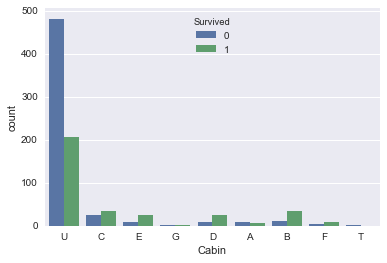

In [353]:
##Cabin processing
#data['Cabin'].value_counts().plot(kind='bar')
#sns.countplot(data['Cabin'].dropna(),hue=data['Survived'])
#data.groupby('Cabin').mean()
data['Cabin'] = data['Cabin'].fillna('U')
data.isnull().sum()
data['Cabin'] = data['Cabin'].apply(lambda x: x[0])
#data['Cabin'].value_counts().plot(kind='bar')
sns.countplot(data['Cabin'].dropna(),hue=data['Survived'])
cabin = py.get_dummies(data['Cabin'],drop_first=True)
#data = py.concat([data,cabin],axis=1)
data.head()

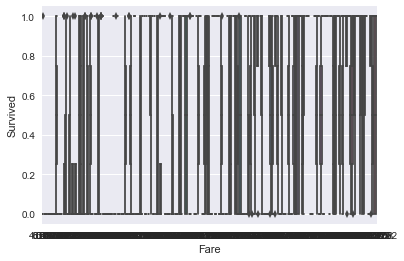

In [354]:
sns.boxplot(data['Fare'],data['Survived'])

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
nameLen        0
FamilySize     0
dtype: int64

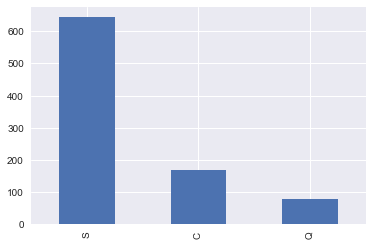

In [355]:
data['Embarked'].value_counts().plot(kind='bar')
data['Embarked'].fillna('S',inplace=True)
embark = py.get_dummies(data['Embarked'],drop_first=True)
embark
sex = py.get_dummies(data['Sex'],drop_first=True)
sex
data.isnull().sum()

In [356]:
data.drop(['Embarked','Sex'],axis=1,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,Title,nameLen,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,U,0,23,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C,1,51,2
2,3,1,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,U,2,22,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C,1,44,2
4,5,0,3,"Allen, Mr. William Henry",35.0,373450,8.0500,U,0,24,1


In [357]:
data = py.concat([data,embark,sex],axis=1)

In [358]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,Title,nameLen,FamilySize,Q,S,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,U,0,23,2,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C,1,51,2,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,U,2,22,1,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C,1,44,2,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,373450,8.0500,U,0,24,1,0,1,1


In [359]:
data.drop(['Cabin', 'Ticket','Name'],axis=1,inplace=True)


In [360]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
Fare           0
Title          0
nameLen        0
FamilySize     0
Q              0
S              0
male           0
dtype: int64

In [361]:
from sklearn.linear_model import LogisticRegression

In [362]:
from sklearn.cross_validation import train_test_split

In [363]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), data['Survived'], test_size=0.33, random_state=42)

In [364]:
model = LogisticRegression()


In [365]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

    predict = model.predict(X_test)

In [366]:
predict = model.predict(X_test)

In [367]:
from sklearn.metrics import classification_report,confusion_matrix

In [368]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[152  23]
 [ 29  91]]
             precision    recall  f1-score   support

          0       0.84      0.87      0.85       175
          1       0.80      0.76      0.78       120

avg / total       0.82      0.82      0.82       295



In [369]:
testData = py.read_csv('test (2).csv')

In [370]:
testData.head()
testData['nameLen'] = testData['Name'].apply(lambda x: len(x))
testData['Title'] = testData['Name'].str.extract(', ([a-zA-Z]+)\. ')
py.crosstab(testData['Title'], testData['Sex'])
testData.head()
testData['Title'].value_counts()
mapTitle = {"Mr":0,"Mrs":1,"Miss":2, "Master":3,"Other":4}
testData['Title'] = testData['Title'].apply(lambda x : mapTitleFun(x))
testData['Title'].value_counts()
testData.head()
testData['FamilySize'] = testData['SibSp'] + testData['Parch']+1
#sns.jointplot(testData['FamilySize'],testData['Survived'],kind = 'reg')
testData.drop(['SibSp','Parch'],axis=1,inplace=True)

C:\Users\d062804\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


In [371]:
testData['Cabin'] = testData['Cabin'].fillna('U')

testData['Cabin'] = testData['Cabin'].apply(lambda x: x[0])
#data['Cabin'].value_counts().plot(kind='bar')
#sns.countplot(testData['Cabin'].dropna(),hue=testData['Survived'])
cabin = py.get_dummies(testData['Cabin'],drop_first=True)
#testData = py.concat([testData,cabin],axis=1)
testData.isnull().sum()
testData.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)

In [372]:
testData.groupby(['Sex','Pclass','Title']).mean()


PassengerId        Age        Fare    nameLen  FamilySize
Sex    Pclass Title                                                           
female 1      1      1099.371429  45.606061  102.287023  46.542857    2.314286
              2      1101.428571  31.428571  149.329471  24.214286    1.500000
              4      1306.000000  39.000000  108.900000  28.000000    1.000000
       2      1      1099.500000  33.000000   25.569643  42.142857    2.071429
              2      1121.437500  17.370000   27.199219  24.687500    2.500000
       3      1      1070.260870  29.875000   16.527178  40.739130    2.826087
              2      1095.333333  19.872647   12.521962  25.229167    1.895833
              4       980.000000        NaN    7.750000  23.000000    1.000000
male   1      0      1095.384615  41.200000   68.724521  26.423077    1.576923
              3      1022.000000   9.500000  198.437500  29.000000    4.000000
              4      1100.666667  51.000000  112.627767  22.666667    2.000000
       2      0      1126.576271  31.718182   19.951410  23.915254    1.372881
              3      1033.500000   5.000000   27.750000  28.000000    3.000000
              4      1048.500000  35.500000   19.500000  25.500000    2.000000
       3      0      1092.085271  27.198795   10.615788  21.992248    1.426357
              3      1145.882353   7.454615   20.941171  28.294118    4.058824

In [373]:
#testData['Age'] = testData.apply(lambda x : processAge(x) if np.isnan(x['Age']) else x['Age'],axis=1)
testData['Age'] = testData['Age'].fillna(testData['Age'].mean())
embark_test = py.get_dummies(testData['Embarked'],drop_first=True)
sex_test = py.get_dummies(testData['Sex'],drop_first=True)
testData.drop(['Embarked','Sex'],inplace=True,axis=1)

In [374]:
sex_test

,male
0,1
1,0
2,1
3,1
4,0
5,1
6,0
7,1
8,0
9,1


In [375]:
#testData['Age'] = testData['Age'].fillna(testData['Age'].mean())
testData['Fare'] = testData['Fare'].fillna(testData['Fare'].mean())
testData.isnull().sum()

PassengerId    0
Pclass         0
Age            0
Fare           0
nameLen        0
Title          0
FamilySize     0
dtype: int64

In [376]:
test_data = py.concat([testData,embark_test,sex_test],axis=1)
test_data.isnull().sum()
#test_data['T'] = py.DataFrame(np.zeros(test_data.shape[0]))
test_data.isnull().sum()

PassengerId    0
Pclass         0
Age            0
Fare           0
nameLen        0
Title          0
FamilySize     0
Q              0
S              0
male           0
dtype: int64

In [377]:
test_data.head()

,PassengerId,Pclass,Age,Fare,nameLen,Title,FamilySize,Q,S,male
0,892,3,34.5,7.8292,16,0,1,1,0,1
1,893,3,47.0,7.0000,32,1,2,0,1,0
2,894,2,62.0,9.6875,25,0,1,1,0,1
3,895,3,27.0,8.6625,16,0,1,0,1,1
4,896,3,22.0,12.2875,44,1,3,0,1,0


In [378]:
test_predict = model.predict(test_data)

In [379]:
test_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [380]:
testDf = py.DataFrame(test_predict,columns=['Survived'])
testDf.head()

,Survived
0,1
1,1
2,1
3,1
4,1


In [269]:
testResult = py.concat([test_data['PassengerId'],testDf],axis=1)

In [270]:
testResult.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1


In [271]:
testResult.to_csv('TestResult.csv',index=False,columns=['PassengerId','Survived'])

In [272]:
from sklearn.svm import SVC

In [273]:
svc = SVC()

In [274]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [275]:
svc_predict = svc.predict(X_test)

In [276]:
print(confusion_matrix(y_test,svc_predict))
print(classification_report(y_test,svc_predict))

[[175   0]
 [120   0]]
             precision    recall  f1-score   support

          0       0.59      1.00      0.74       175
          1       0.00      0.00      0.00       120

avg / total       0.35      0.59      0.44       295



C:\Users\d062804\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [277]:
svc_test_predict= svc.predict(test_data)

In [278]:
svctestDf = py.DataFrame(svc_test_predict,columns=['Survived'])
svctestResult = py.concat([test_data['PassengerId'],svctestDf],axis=1)
svctestResult.to_csv('SVCTestResult.csv',index=False,columns=['PassengerId','Survived'])

In [279]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
print(confusion_matrix(y_test,Y_pred))
print(classification_report(y_test,Y_pred))

[[143  32]
 [ 37  83]]
             precision    recall  f1-score   support

          0       0.79      0.82      0.81       175
          1       0.72      0.69      0.71       120

avg / total       0.76      0.77      0.77       295



In [280]:
DT_test_predict= decision_tree.predict(test_data)
DTtestDf = py.DataFrame(DT_test_predict,columns=['Survived'])
DTtestResult = py.concat([test_data['PassengerId'],DTtestDf],axis=1)
DTtestResult.to_csv('DTTestResult.csv',index=False,columns=['PassengerId','Survived'])